In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import random

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train,y_train) , (X_test,y_test) = fashion_mnist.load_data()

In [ ]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

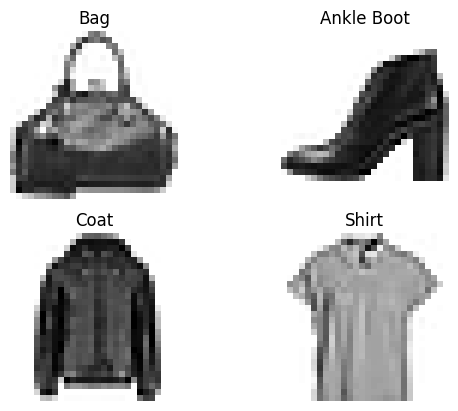

In [ ]:
for i in range(4):
  index = random.randint(0,len(X_train))
  plt.subplot(2,2,i+1)
  plt.imshow(X_train[index],cmap = plt.cm.binary)
  plt.title(class_names[y_train[index]])
  plt.axis(False)

In [ ]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(28, (3, 3), activation='relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.experimental.RMSprop(0.001),
              metrics = ['accuracy'])
history = model.fit(X_train_norm,y_train_onehot,epochs = 25,validation_data = (X_test_norm,y_test_onehot))

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4527 - accuracy: 0.8405 - val_loss: 0.3701 - val_accuracy: 0.8707
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3233 - accuracy: 0.8880 - val_loss: 0.3210 - val_accuracy: 0.8884
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2913 - accuracy: 0.8992 - val_loss: 0.3128 - val_accuracy: 0.8891
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9046 - val_loss: 0.2950 - val_accuracy: 0.8961
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9108 - val_loss: 0.3005 - val_accuracy: 0.8914
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2484 - accuracy: 0.9133 - val_loss: 0.2889 - val_accuracy: 0.8980
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2390 - accuracy: 0.9172 - val_loss: 0.2831 - val_accuracy:

<Axes: >

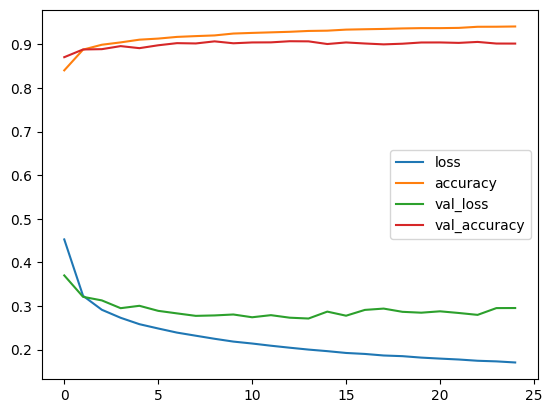

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
import itertools
from  sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes = None,figsize = (10,10),text_size = 15):

  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:,np.newaxis]   #Normalize our confusion matrix
  n_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm,cmap = plt.cm.Blues)
  fig.colorbar(cax)
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels
        )
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
    horizontalalignment = 'center',
    color = 'white' if cm[i,j]> threshold else "black",
    size = text_size*0.8
    )

In [ ]:
y_probs = model.predict(X_test_norm)
y_preds = y_probs.argmax(axis = 1)

313/313 [==============================] - 1s 2ms/step


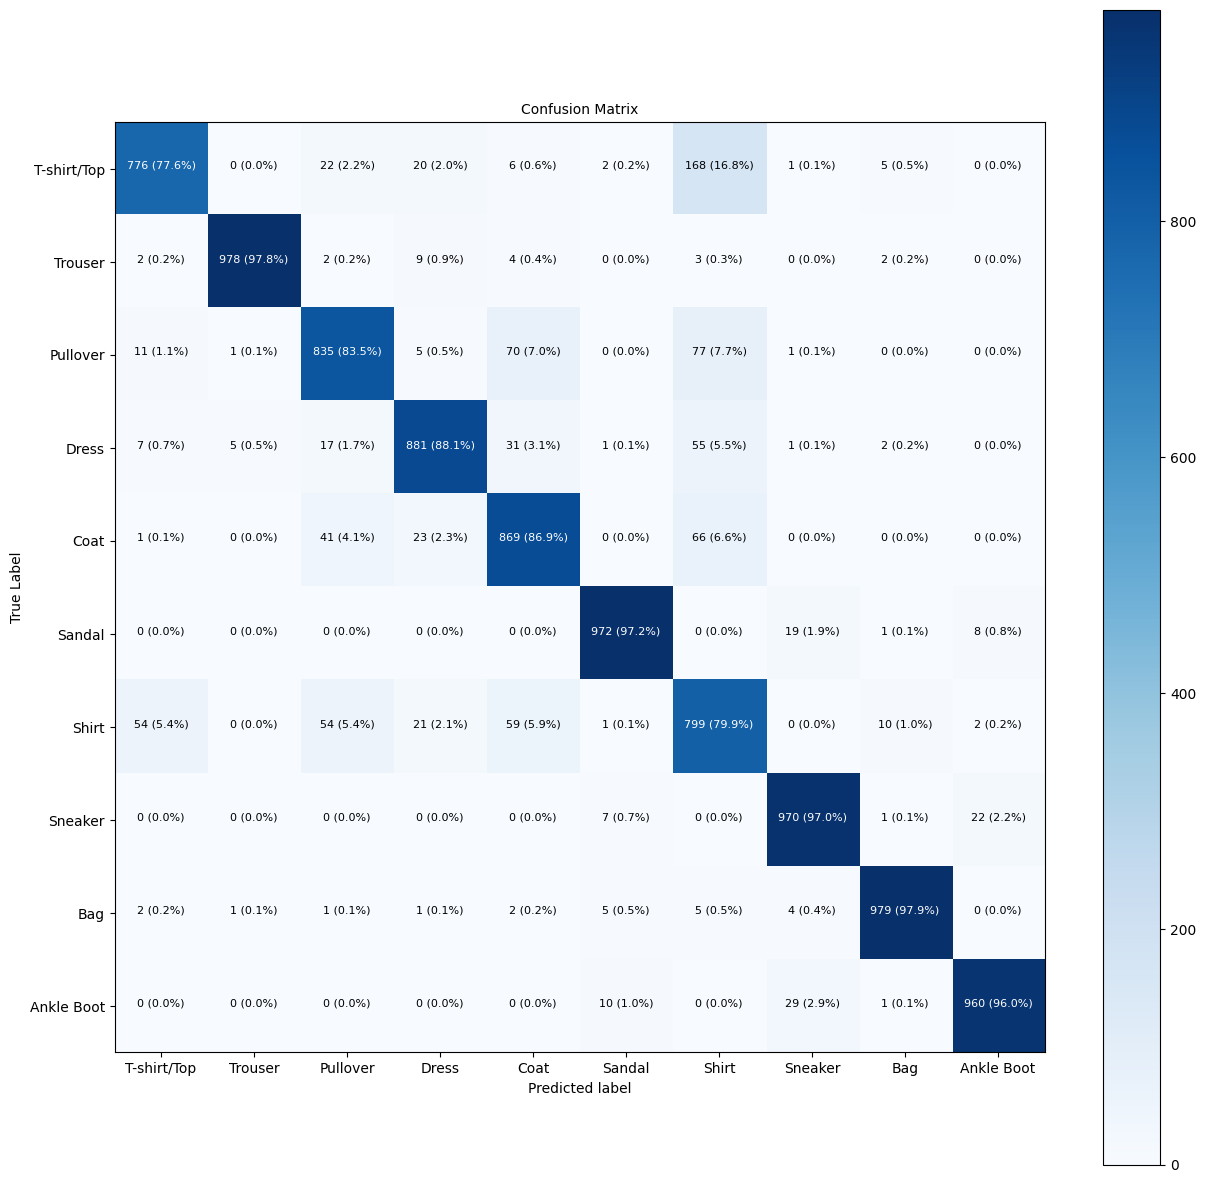

In [ ]:
make_confusion_matrix(y_true = y_test,
                      y_pred = y_preds,
                      classes = class_names,figsize = (15,15),
                      text_size = 10)

In [ ]:
def plot_random_image(model, images, true_labels, classes):
    plt.figure(figsize=(8, 8))
    for i in range(4):
        index = random.randint(0, len(images) - 1)
        target_image = images[index]
        pred_probs = model.predict(target_image.reshape(1, 28, 28))
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[index]]

        plt.subplot(2, 2, i + 1)
        plt.imshow(target_image, cmap=plt.cm.binary)
        if pred_label == true_label:
            color = "green"
        else:
            color = "red"
        plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                          100 * tf.reduce_max(pred_probs),
                                                          true_label),
                   color=color)
    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 27ms/step


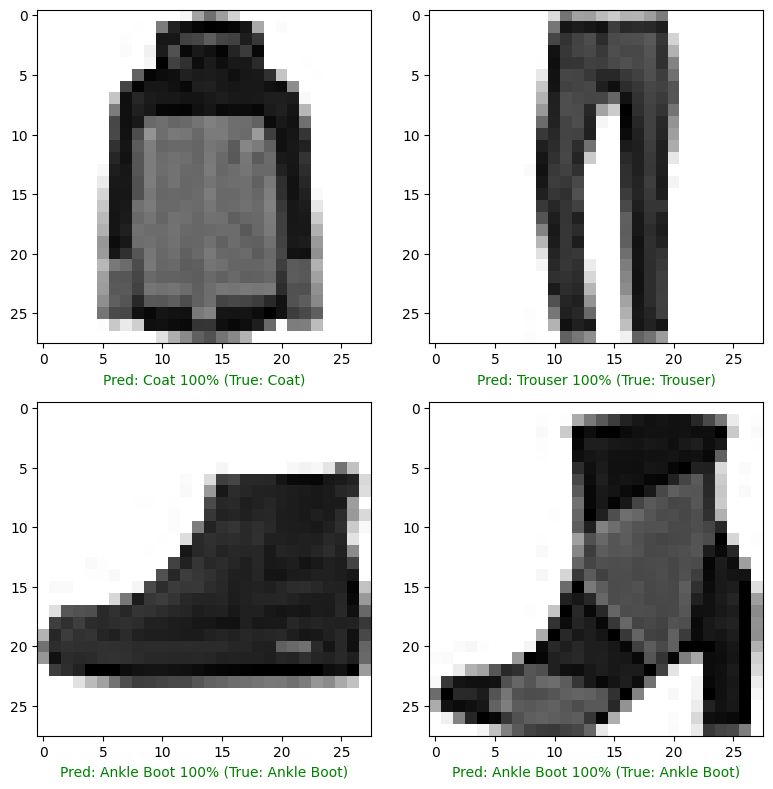

In [ ]:
plot_random_image(model = model,
                  images = X_test_norm,
                  true_labels = y_test,
                  classes = class_names)